# Analysis of BTG Data

In [12]:
from Prediction import Prediction
from DataPreparation import DataPreparation
import pandas as pd
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import os
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [3]:
timestep = 10

In [29]:
cols = ['confirmations', 'strippedsize', 'difficulty',
       'size', 'weight', 'nTx', 'total_reward',
       'num_in', 'num_out', 'btg_out', 'hashrate', 'block_time',
        'dummy_miner_before', 'dummy_miner_count']

In [28]:
with open('/Users/francaspeth/Downloads/franca1106/BTGslidallVarmodel_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Downloads/franca1106/BTGslidallVarweights_only.h5')

In [32]:
test1 = pd.read_csv('/Volumes/Thesis/BitcoinGold_csv/BTG_Test1_labeled.csv')
test2 = pd.read_csv('/Volumes/Thesis/BitcoinGold_csv/BTG_Test2_labeled.csv')

label_list1 = test1['label'].tolist()
label_list2 = test2['label'].tolist()

PrepTest1 = DataPreparation(test1, timestep)
PrepTest2 = DataPreparation(test2, timestep)
PrepTest1.df = PrepTest1.df.sort_values('height')
PrepTest1.df = PrepTest1.df.set_index(pd.Index(list(range(1, len(PrepTest1.df) + 1))))
#PrepTrain1.change_data_types(cols)
PrepTest1.add_miner_dummy()
PrepTest1.add_miner_count()
PrepTest1.df = PrepTest1.df.loc[:,cols]
test1p = PrepTest1.transform_data()

PrepTest2.df = PrepTest2.df.sort_values('height')
PrepTest2.df = PrepTest2.df.set_index(pd.Index(list(range(1, len(PrepTest2.df) + 1))))
#PrepTrain1.change_data_types(cols)
PrepTest2.add_miner_dummy()
PrepTest2.add_miner_count()
PrepTest2.df = PrepTest2.df.loc[:,cols]
test2p = PrepTest2.transform_data()

Exception for Lists first Datapoint
Exception for Lists first Datapoint


In [33]:
test1.columns

Index(['Unnamed: 0', 'height', 'confirmations', 'strippedsize', 'difficulty',
       'size', 'weight', 'time', 'mediantime', 'nTx', 'miner', 'total_reward',
       'num_in', 'num_out', 'btg_out', 'hashrate', 'block_time', 'label'],
      dtype='object')

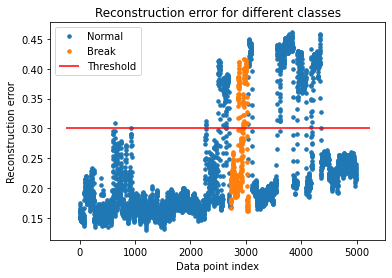

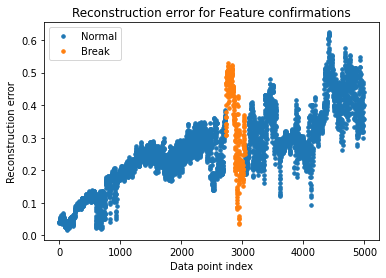

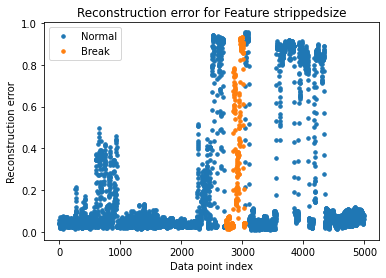

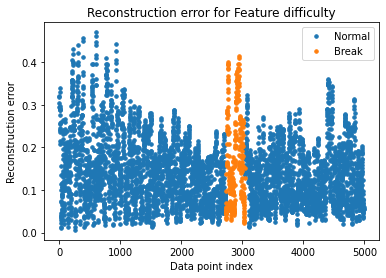

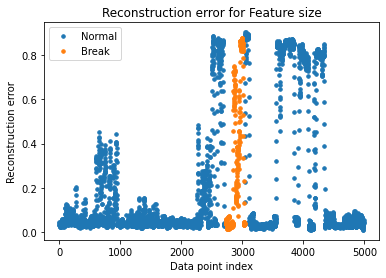

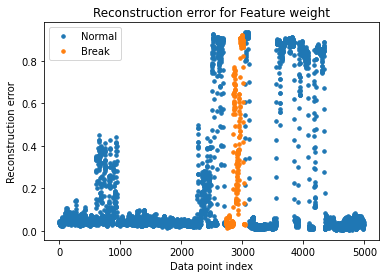

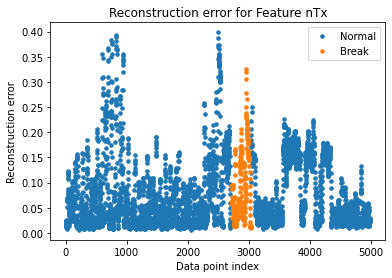

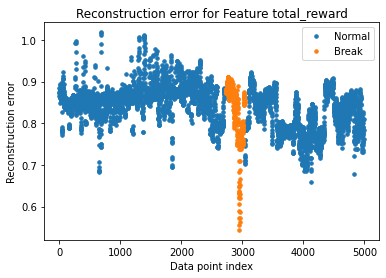

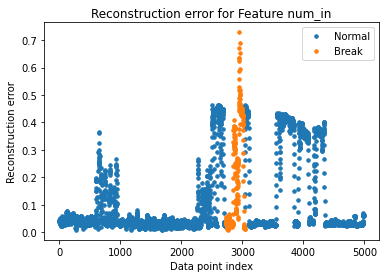

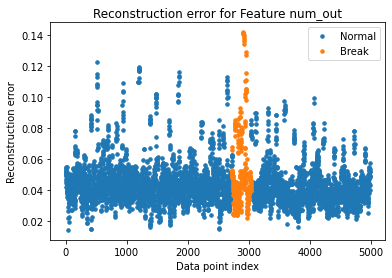

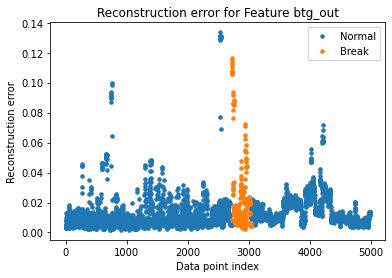

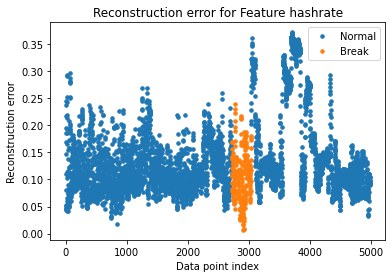

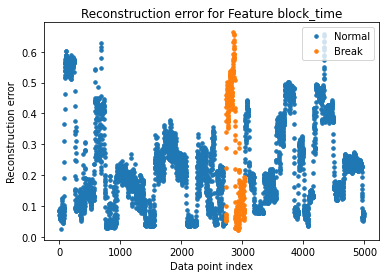

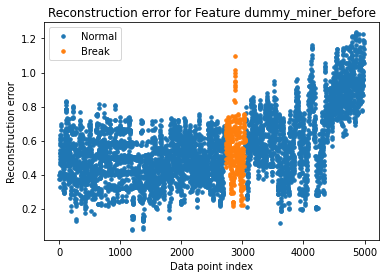

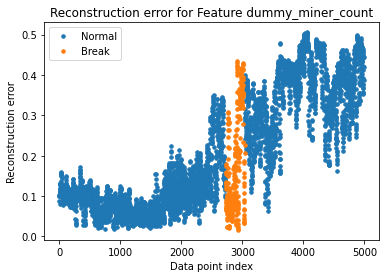

In [34]:
Pred1 = Prediction(
    model = model,
    test = test1p
)
Pred1.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list1[timestep:])
Pred1.plot_error_all_features(cols, label_list1[timestep:])

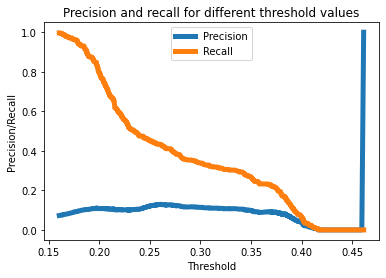

In [35]:
Pred1.plot_pr_diagram(label_list1,timestep)

In [36]:
Pred1.performance(0.2,label_list1, timestep)

The number of malicous blocks is: 314 The number of normal blocks: 4685
The classifications using the MAD method with threshold=0.04 are as follows:
[[2616 2059]
 [  64  250]]

% of transactions labeled as fraud that were correct (precision): 250/(2059+250) = 10.83%
% of fraudulent transactions were caught succesfully (recall):    250/(64+250) = 79.62%
Accuracy: 57.45% 
F1 Score: 0.19062142584826533


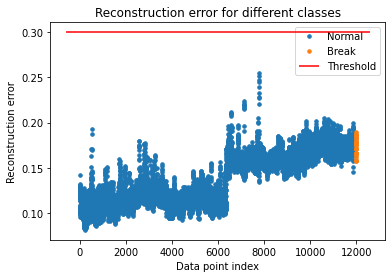

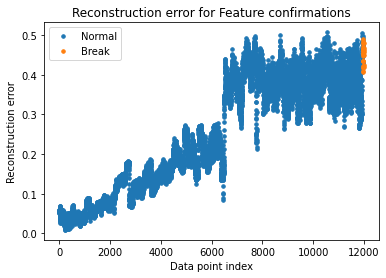

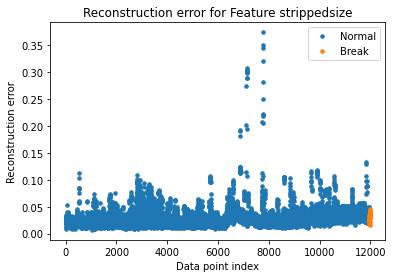

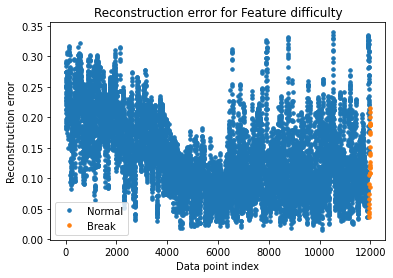

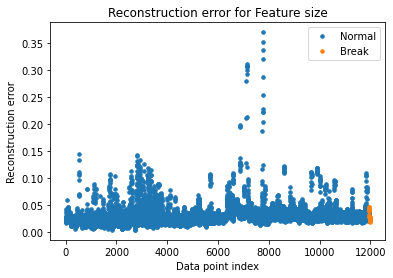

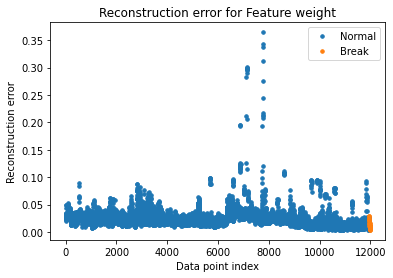

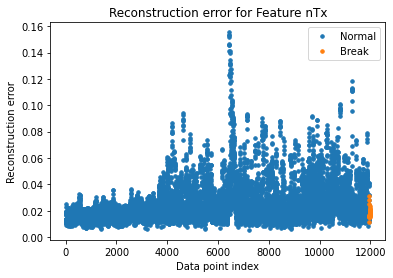

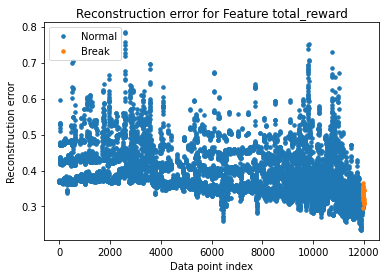

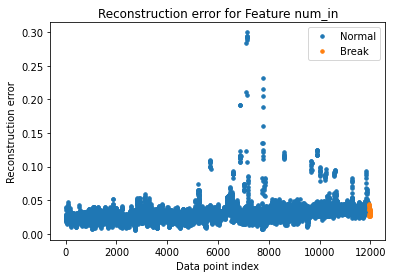

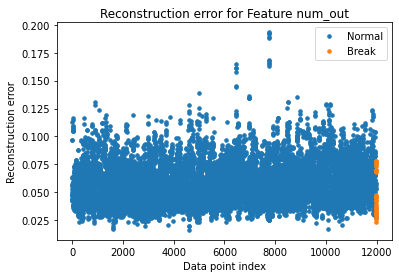

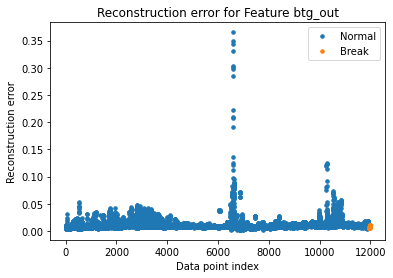

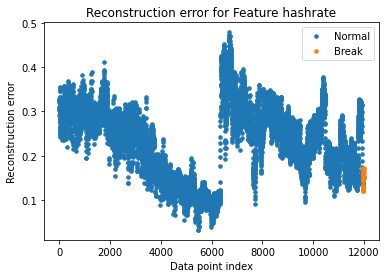

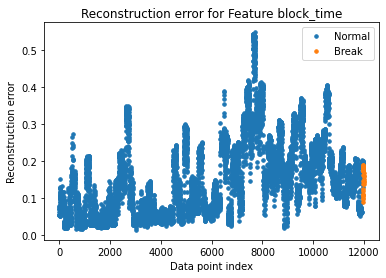

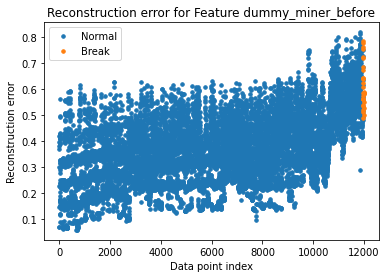

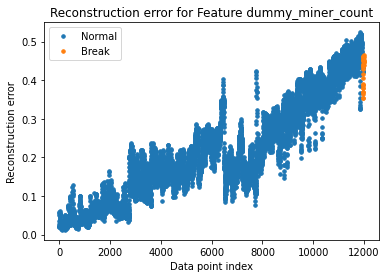

In [37]:
Pred2 = Prediction(
    model = model,
    test = test2p
)
Pred2.make_prediction()
Pred2.plot_avg_reconstruction_error(label_list2[timestep:])
Pred2.plot_error_all_features(cols, label_list2[timestep:])

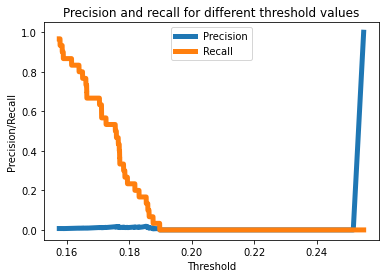

In [38]:
Pred2.plot_pr_diagram(label_list2,timestep)

## Model with reduced Features: 

In [47]:
cols = ['confirmations', 'difficulty','num_in', 
        'hashrate', 'block_time', 'dummy_miner_count']

In [48]:
with open('/Users/francaspeth/Downloads/franca_11.06_2/BTGslidminVarmodel_config.json') as json_file:
    json_config = json_file.read()
model = tf.keras.models.model_from_json(json_config)
model.load_weights('/Users/francaspeth/Downloads/franca_11.06_2/BTGslidminVarweights_only.h5')

In [50]:
test1 = pd.read_csv('/Volumes/Thesis/BitcoinGold_csv/BTG_Test1_labeled.csv')
test2 = pd.read_csv('/Volumes/Thesis/BitcoinGold_csv/BTG_Test2_labeled.csv')

label_list1 = test1['label'].tolist()
label_list2 = test2['label'].tolist()

PrepTest1 = DataPreparation(test1, timestep)
PrepTest2 = DataPreparation(test2, timestep)
PrepTest1.df = PrepTest1.df.sort_values('height')
PrepTest1.df = PrepTest1.df.set_index(pd.Index(list(range(1, len(PrepTest1.df) + 1))))
#PrepTrain1.change_data_types(cols)
PrepTest1.add_miner_dummy()
PrepTest1.add_miner_count()
PrepTest1.df = PrepTest1.df.loc[:,cols]
test1p = PrepTest1.transform_data()

PrepTest2.df = PrepTest2.df.sort_values('height')
PrepTest2.df = PrepTest2.df.set_index(pd.Index(list(range(1, len(PrepTest2.df) + 1))))
#PrepTrain1.change_data_types(cols)
PrepTest2.add_miner_dummy()
PrepTest2.add_miner_count()
PrepTest2.df = PrepTest2.df.loc[:,cols]
test2p = PrepTest2.transform_data()

Exception for Lists first Datapoint
Exception for Lists first Datapoint


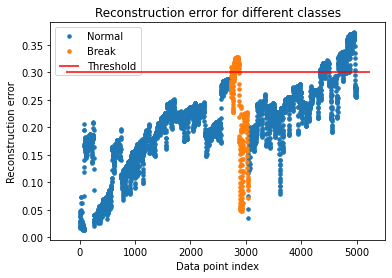

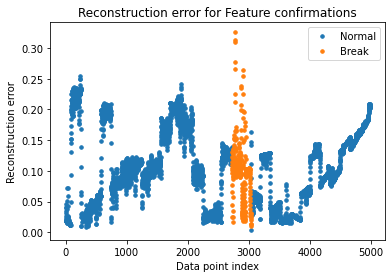

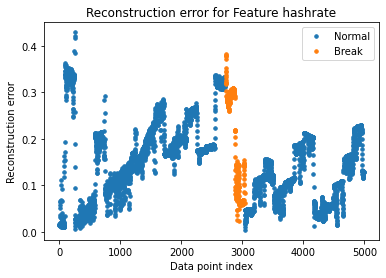

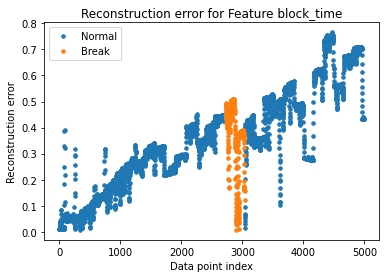

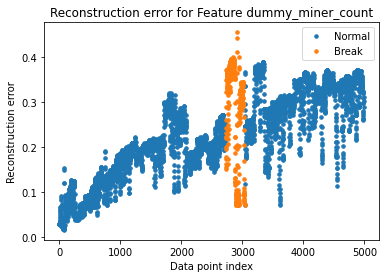

In [52]:
Pred1 = Prediction(
    model = model,
    test = test1p
)
Pred1.make_prediction()
Pred1.plot_avg_reconstruction_error(label_list1[timestep:])
Pred1.plot_error_all_features(cols, label_list1[timestep:])

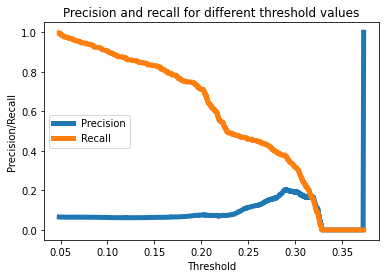

In [53]:
Pred1.plot_pr_diagram(label_list1,timestep)

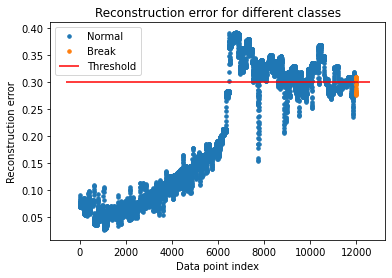

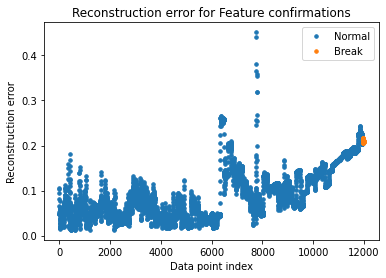

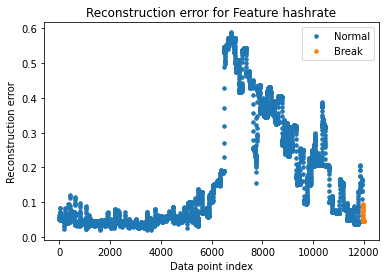

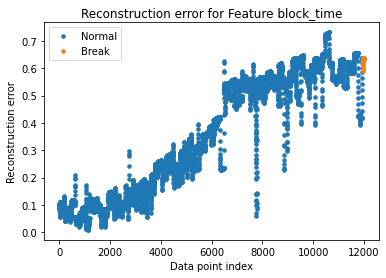

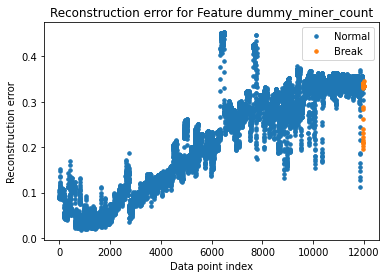

In [54]:
Pred2 = Prediction(
    model = model,
    test = test2p
)
Pred2.make_prediction()
Pred2.plot_avg_reconstruction_error(label_list2[timestep:])
Pred2.plot_error_all_features(cols, label_list2[timestep:])

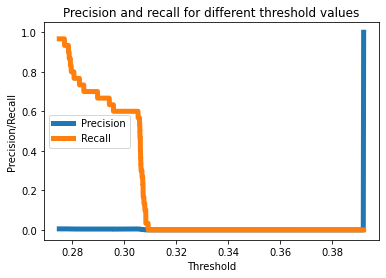

In [55]:
Pred2.plot_pr_diagram(label_list2,timestep)

In [46]:
PrepTest2.df.dummy_miner_count.describe()

count    4999.000000
mean        1.381276
std         2.936479
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        33.000000
Name: dummy_miner_count, dtype: float64